<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats  as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Median Value of Owner-occupied Homes')

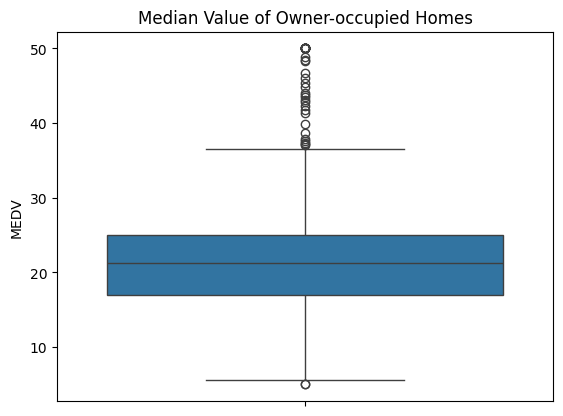

In [5]:
sns.boxplot(y='MEDV', data=boston_df).set_title('Median Value of Owner-occupied Homes')

Text(0.5, 1.0, 'CHAS')

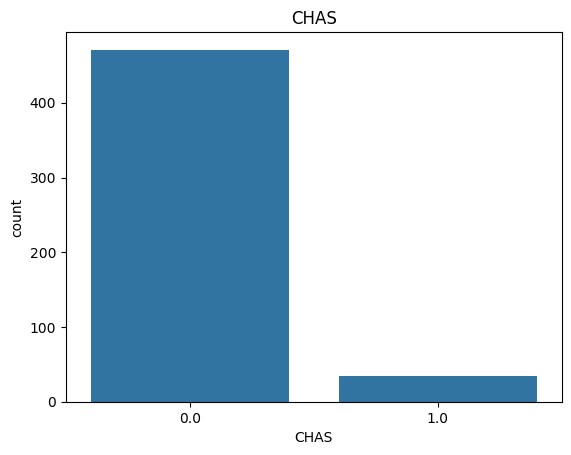

In [7]:
sns.countplot(x='CHAS', data=boston_df).set_title('CHAS')

Text(0.5, 1.0, 'MEDV vs Age Group')

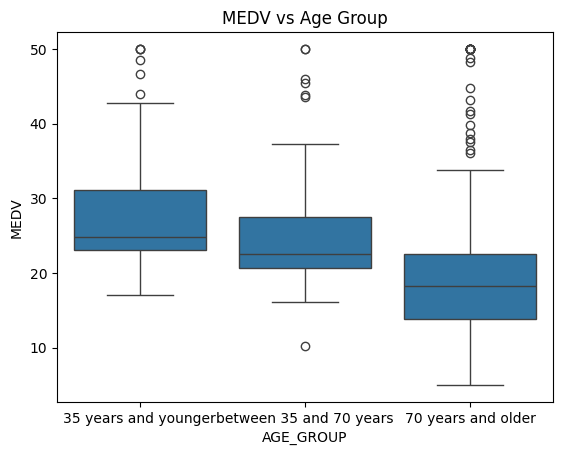

In [14]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df).set_title('MEDV vs Age Group')

Text(0.5, 1.0, 'NOX vs INDUS Relationship')

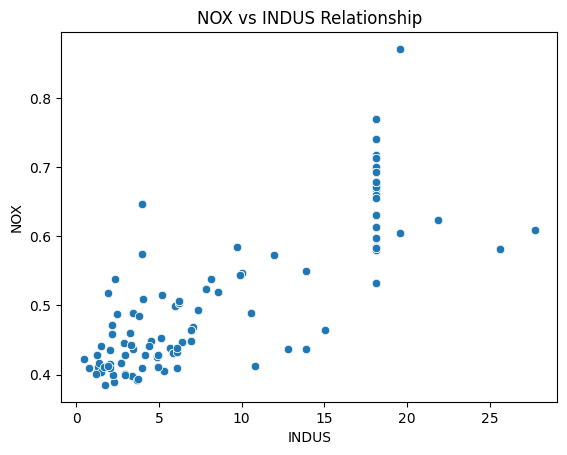

In [15]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df).set_title('NOX vs INDUS Relationship')

Text(0.5, 1.0, 'Pupil to Teacher Ratio Distribution')

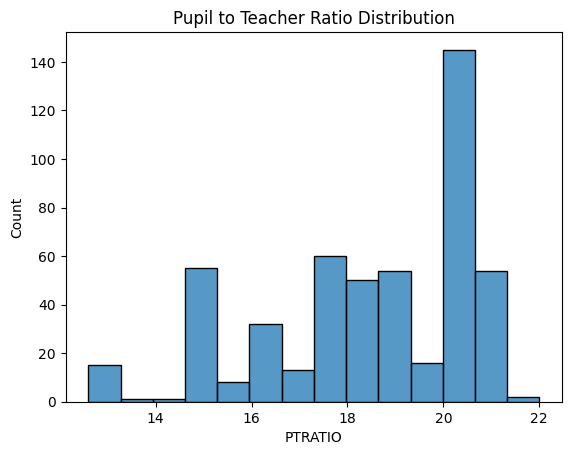

In [16]:
sns.histplot(x='PTRATIO', data=boston_df).set_title('Pupil to Teacher Ratio Distribution')

# T-test for Independent Samples:
## Hypothesis:
* Null hypothesis (H0): There is no significant difference in MEDV between houses bounded by the Charles river and those not bounded.
  
* Alternative hypothesis (H1): There is a significant difference in MEDV between houses bounded by the Charles river and those not bounded.
  
### Test: we are goling to use scipy.stats.ttest_ind() to perform the T-test.

In [22]:
medv_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(medv_bounded, medv_not_bounded)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in MEDV between houses bounded by the Charles river and those not bounded.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV between houses bounded by the Charles river and those not bounded.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in MEDV between houses bounded by the Charles river and those not bounded.


# ANOVA Test
## Hypothesis:
* Null hypothesis (H0): There are no differences in MEDV across different age groups of houses.
* Alternative hypothesis (H1): At least one age group’s MEDV is significantly different from the others.
### Test: we use scipy.stats.f_oneway() to perform ANOVA.

In [23]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[-1, 35, 70, float('inf')], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Group the MEDV values based on these age groups
medv_young = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
medv_middle = boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
medv_old = boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(medv_young, medv_middle, medv_old)

# Print the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are differences in MEDV across different age groups of houses.")
else:
    print("Fail to reject the null hypothesis: There are no differences in MEDV across different age groups of houses.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There are differences in MEDV across different age groups of houses.


# Pearson Correlation:
## Hypothesis:
* Null hypothesis (H0): There is no relationship between NOX and INDUS.
* Alternative hypothesis (H1): There is a relationship between NOX and INDUS.
### Test: we use scipy.stats.pearsonr() to calculate the Pearson correlation coefficient.

In [24]:
nox_values = boston_df['NOX']
indus_values = boston_df['INDUS']

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(nox_values, indus_values)

# Print the results
print("Pearson Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no relationship between NOX and INDUS.")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a relationship between NOX and INDUS.


# Regression Analysis:
## Hypothesis:
* Null hypothesis (H0): The weighted distance to employment centres has no impact on MEDV.
* Alternative hypothesis (H1): The weighted distance to employment centres has an impact on MEDV.
### Test: we use statsmodels.api to perform a regression analysis.

In [25]:
model = ols('MEDV ~ DIS', data=boston_df).fit()

# Get a summary of the regression results
summary = model.summary()

# Print the summary
print(summary)

# Interpretation
# Look at the p-value for the DIS coefficient in the summary table.
# If it's < α (0.05), then there's evidence to reject the null hypothesis,
# indicating that there is an impact of DIS on MEDV.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        08:54:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

### Based on the OLS regression results:

* The R-squared value is 0.062, which means that approximately 6.2% of the variability in MEDV (median value of owner-occupied homes) can be explained by the linear relationship with DIS (weighted distances to five Boston employment centres).
* The F-statistic is 33.58 with a Prob (F-statistic) or p-value of 1.21e-08, which is much less than 0.05. This indicates that the model is statistically significant, and there is a relationship between DIS and MEDV.
* The coefficient for DIS is 1.0916 with a p-value (P>|t|) very close to 0 (since it’s less than 0.05), suggesting that DIS is a significant predictor of MEDV.
* For every one-unit increase in DIS, MEDV increases by an average of 1.0916 units, holding all other variables constant.
#### In conclusion, there is evidence to reject the null hypothesis, indicating that there is a statistically significant impact of DIS on MEDV at the α = 0.05 significance level